In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("bank-full.csv",sep = ';') #separator=; as per given csv file
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
print(f'Data contains {data.shape[0]} samples and {data.shape[1]} variables')

#ID_col=
TARGET_COL='y'

#features = [c for c in data.columns if c not in [ID_COL, TARGET_COL]]
features = [c for c in data.columns if c not in [TARGET_COL]]
print(f'\nThe dataset contains {len(features)} input features')


Data contains 45211 samples and 17 variables

The dataset contains 16 input features


In [5]:
#Distribution of the Target Feature: 'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')

data[TARGET_COL].value_counts(normalize='True') #normalise='True' returns % according to frequency

no     0.883015
yes    0.116985
Name: y, dtype: float64

D:\YogsProgramsFile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

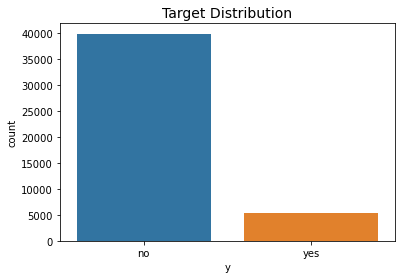

In [6]:
sns.countplot(data[TARGET_COL])
plt.title("Target Distribution", fontsize=14)

In [7]:
#Checking percentage of null values for each column
null_values_per_variable = 100 * (data.isnull().sum()/data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
y            0.0
dtype: float64

In [8]:
#Check for Null Values
data[features].isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [9]:
#removal of duplicate rows
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(45211, 17)
(45211, 17)


In [10]:
#Checking Unique values in each variable
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
#Segregating Categorical & Numerical Variables
cat_cols = ['job','marital','education','default','housing','loan','contact','month','day', 'poutcome']

num_cols = [c for c in features if c not in cat_cols]
num_cols

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

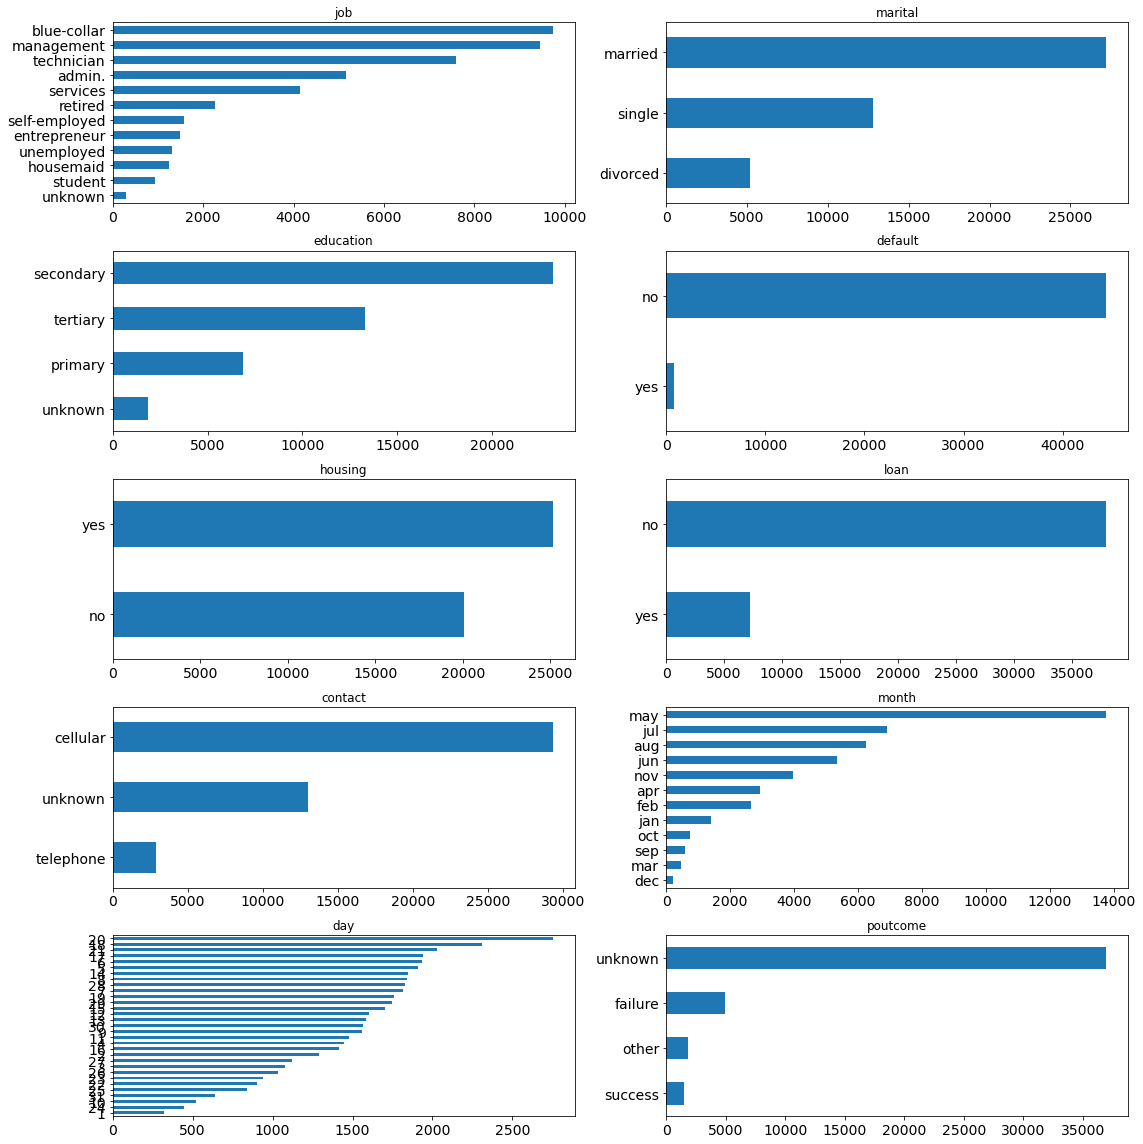

In [13]:
#Univariate Analysis of Categorical Features

#A way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable.

fig, axes = plt.subplots(5, 2, figsize=(16, 16)) #total 10 subplots that's why 5*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

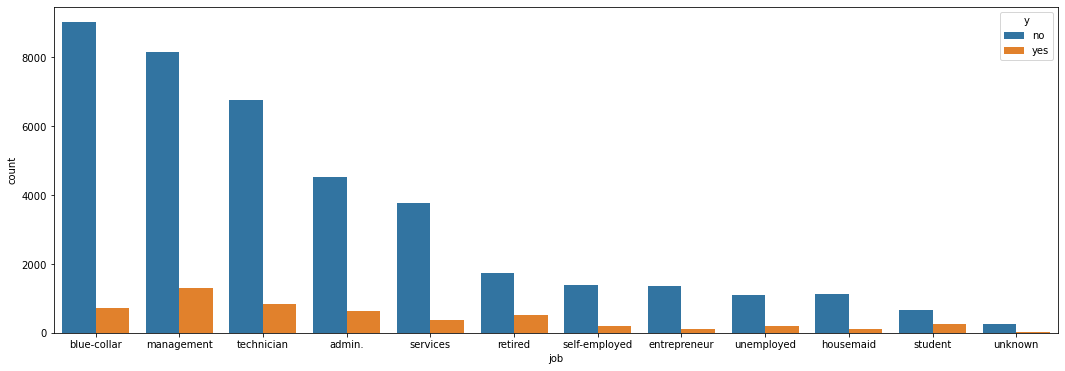

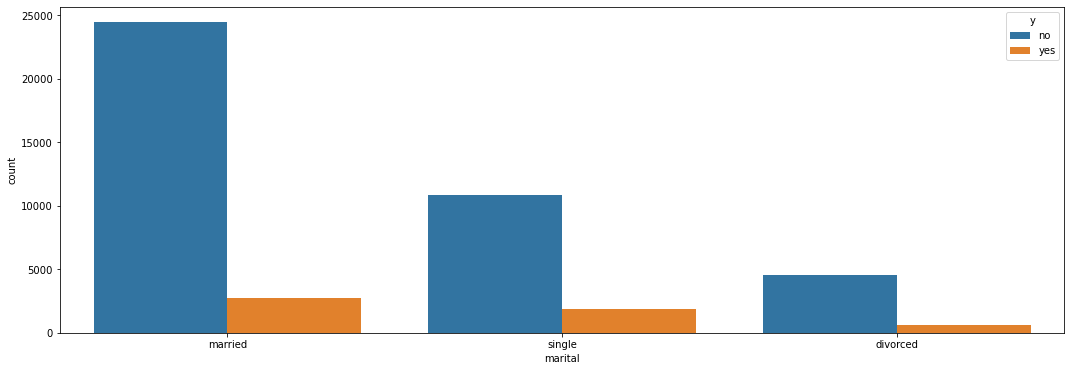

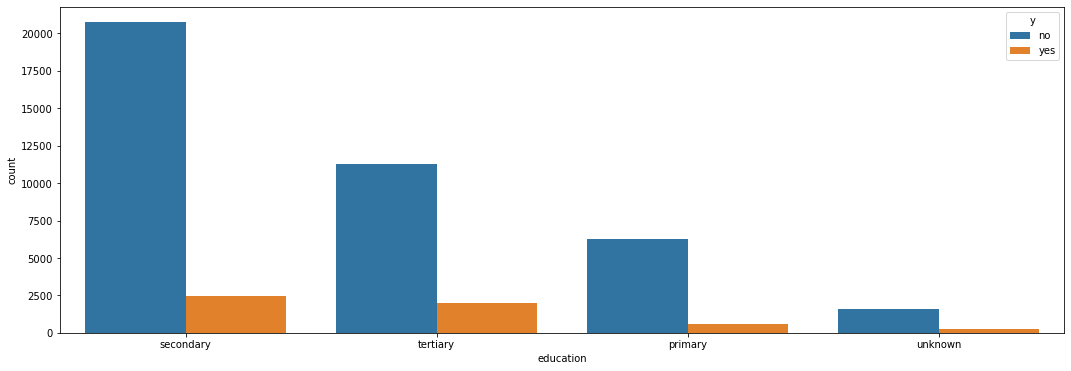

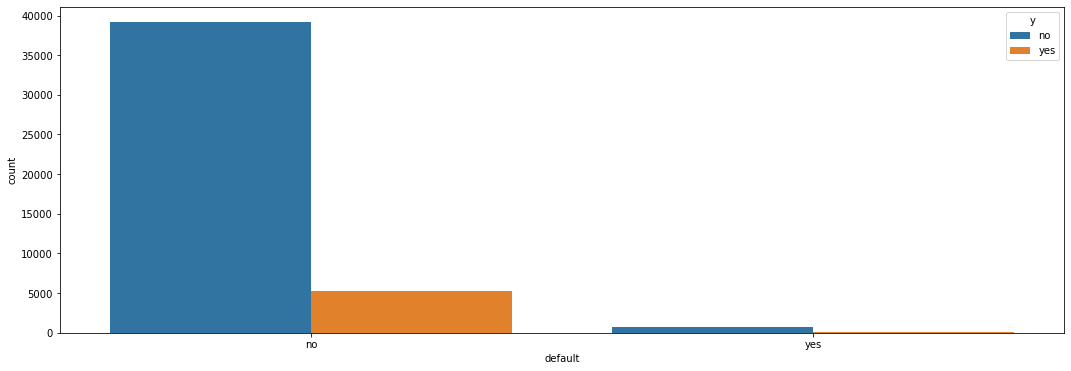

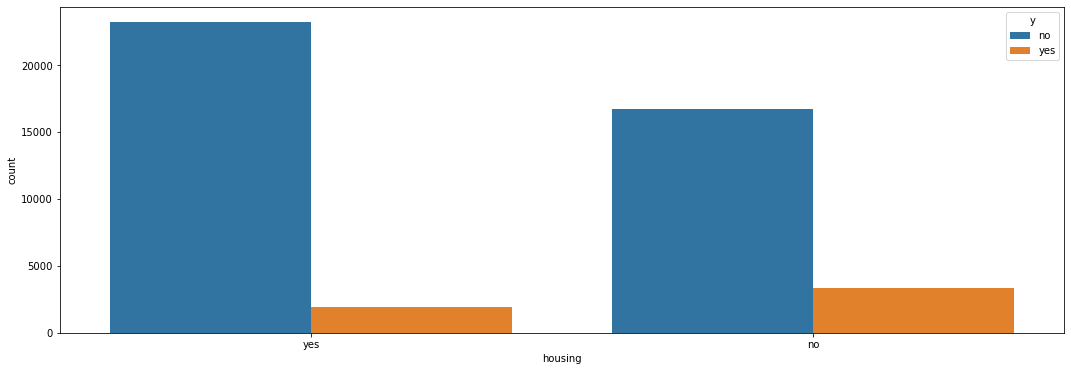

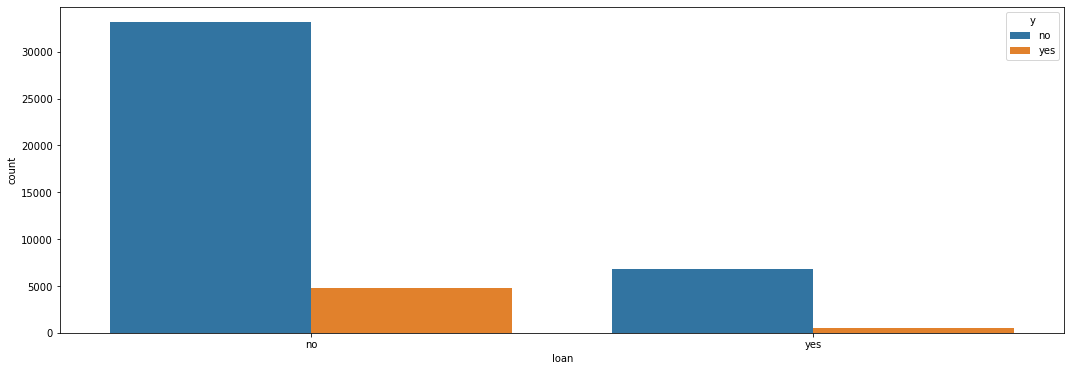

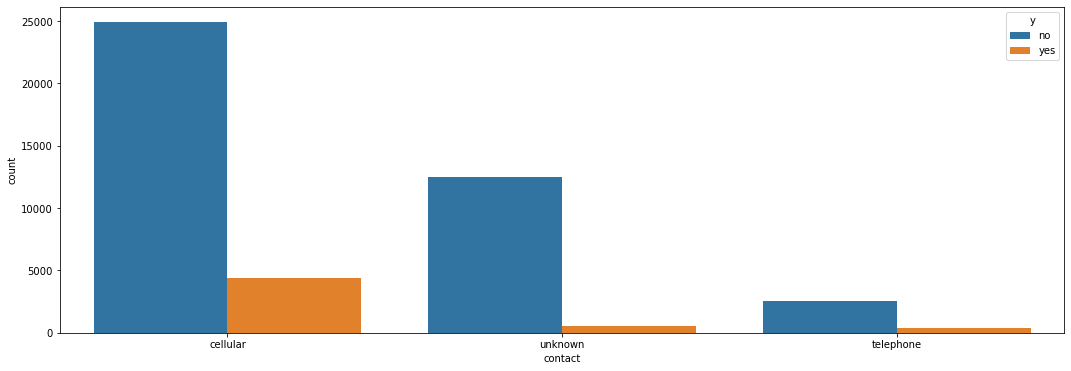

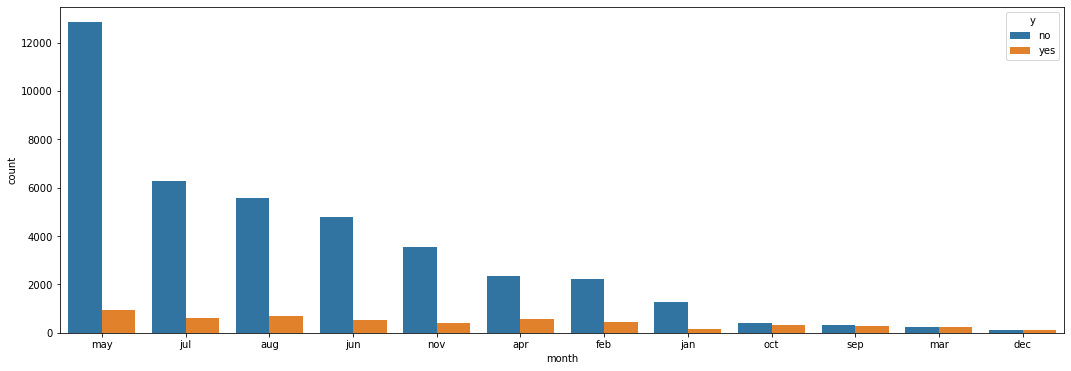

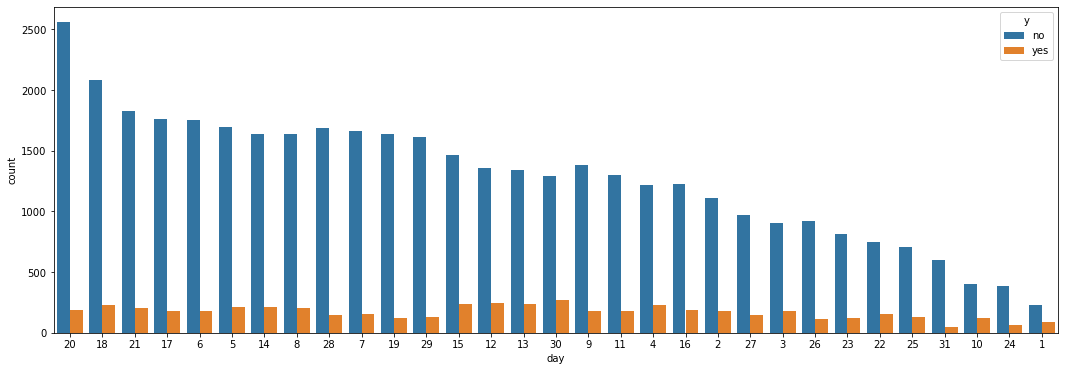

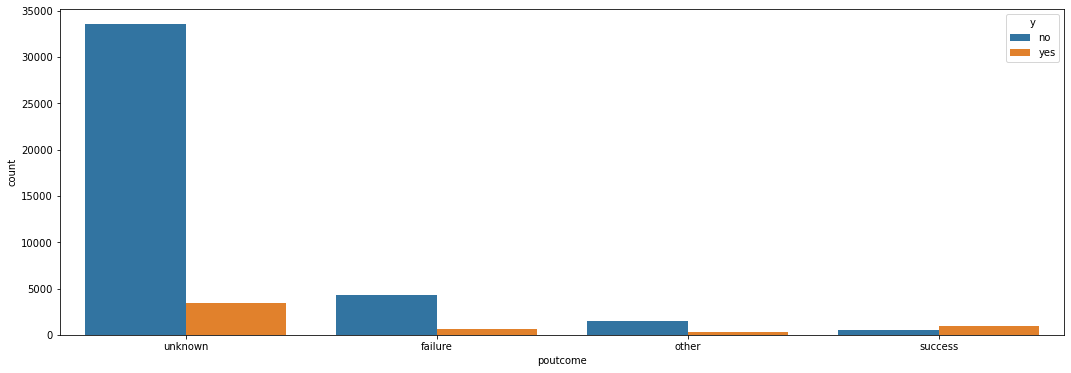

In [14]:
#Bivariate Analysis: Relationships of Categorical Features with Target


for c in cat_cols:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='y',data = data,order = data[c].value_counts().index) #individual bars sorted acc to frequency and then plotted


In [15]:
data1= data.copy()

data1['y'] = data1['y'].replace(['no','yes'],[0,1]) #needed to do below mathematical operations
data1.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = data1.groupby('job').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
total_people = data1.groupby('job').y.count().values

#Form a dataframe and print
jobs = sorted(data1.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
8,student,269,938,28.7
5,retired,516,2264,22.8
10,unemployed,202,1303,15.5
4,management,1301,9458,13.8
0,admin.,631,5171,12.2
6,self-employed,187,1579,11.8
11,unknown,34,288,11.8
9,technician,840,7597,11.1
7,services,369,4154,8.9
3,housemaid,109,1240,8.8


In [16]:
married_subscribers = data1[(data1.marital=='married') ].y.sum()
single_subscribers = data1[(data1.marital=='single') | (data1.marital=='divorced')].y.sum() #single or divorced

married_subscribers_prop = married_subscribers/len(data1[data1.marital=='married'])
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

print('Married clients campaign success rate: {0:.0f}%'.format(married_subscribers_prop*100))
print('Single clients campaign success rate: {0:.0f}%'.format(single_subscribers_prop*100))

No of Married clients who subscribe: 2755
No of Single (and divorced) clients who subscribe : 2534
Married clients campaign success rate: 10%
Single clients campaign success rate: 14%


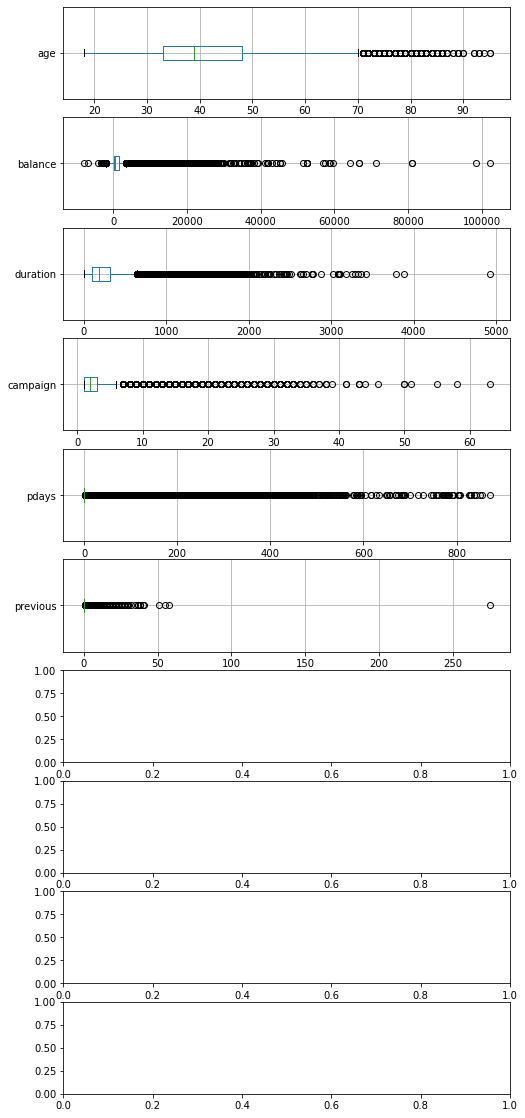

In [17]:
#Numerical Features


#Univariate Analysis using Boxplots
fig, axes = plt.subplots(10, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)

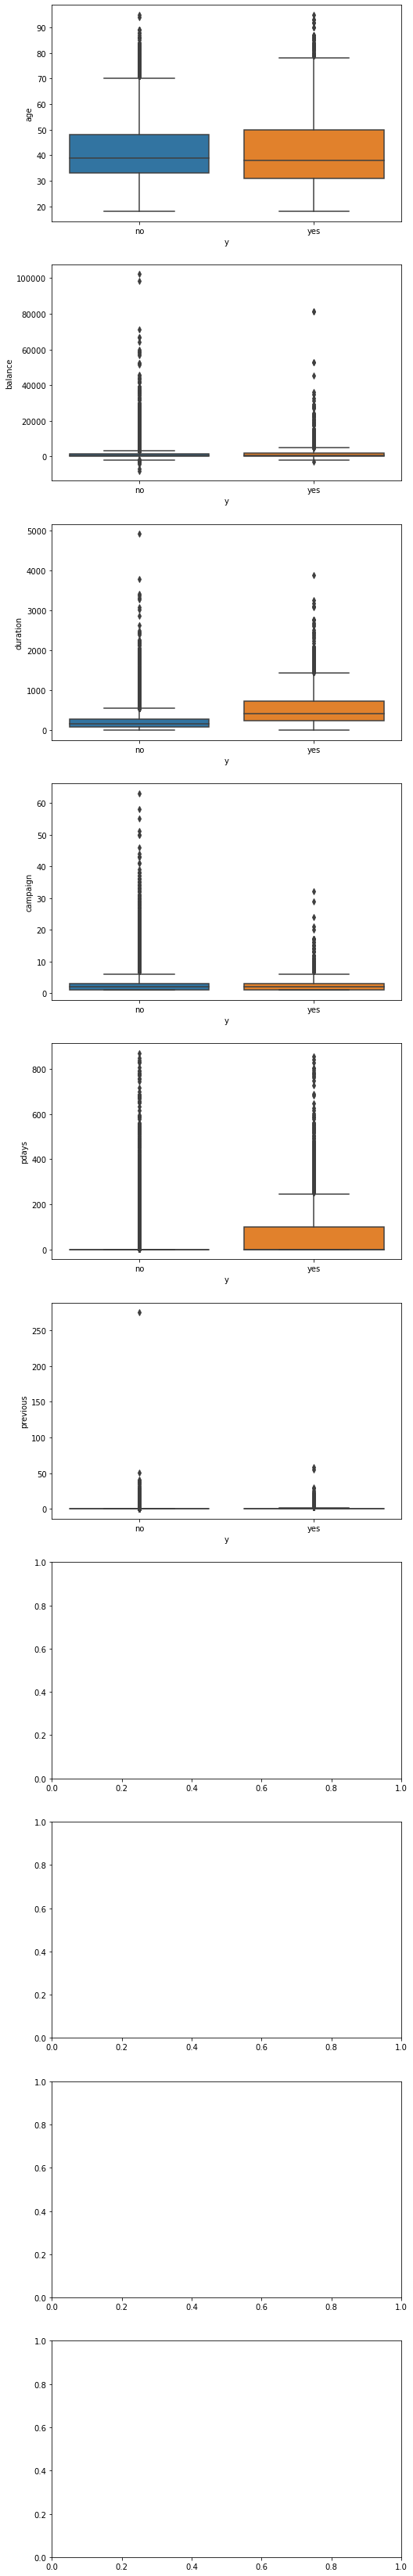

In [18]:
fig, axes = plt.subplots(10, 1, figsize=(8, 60))
for i, c in enumerate(num_cols):
  sns.boxplot(data=data,x='y',y=c,ax=axes[i])  

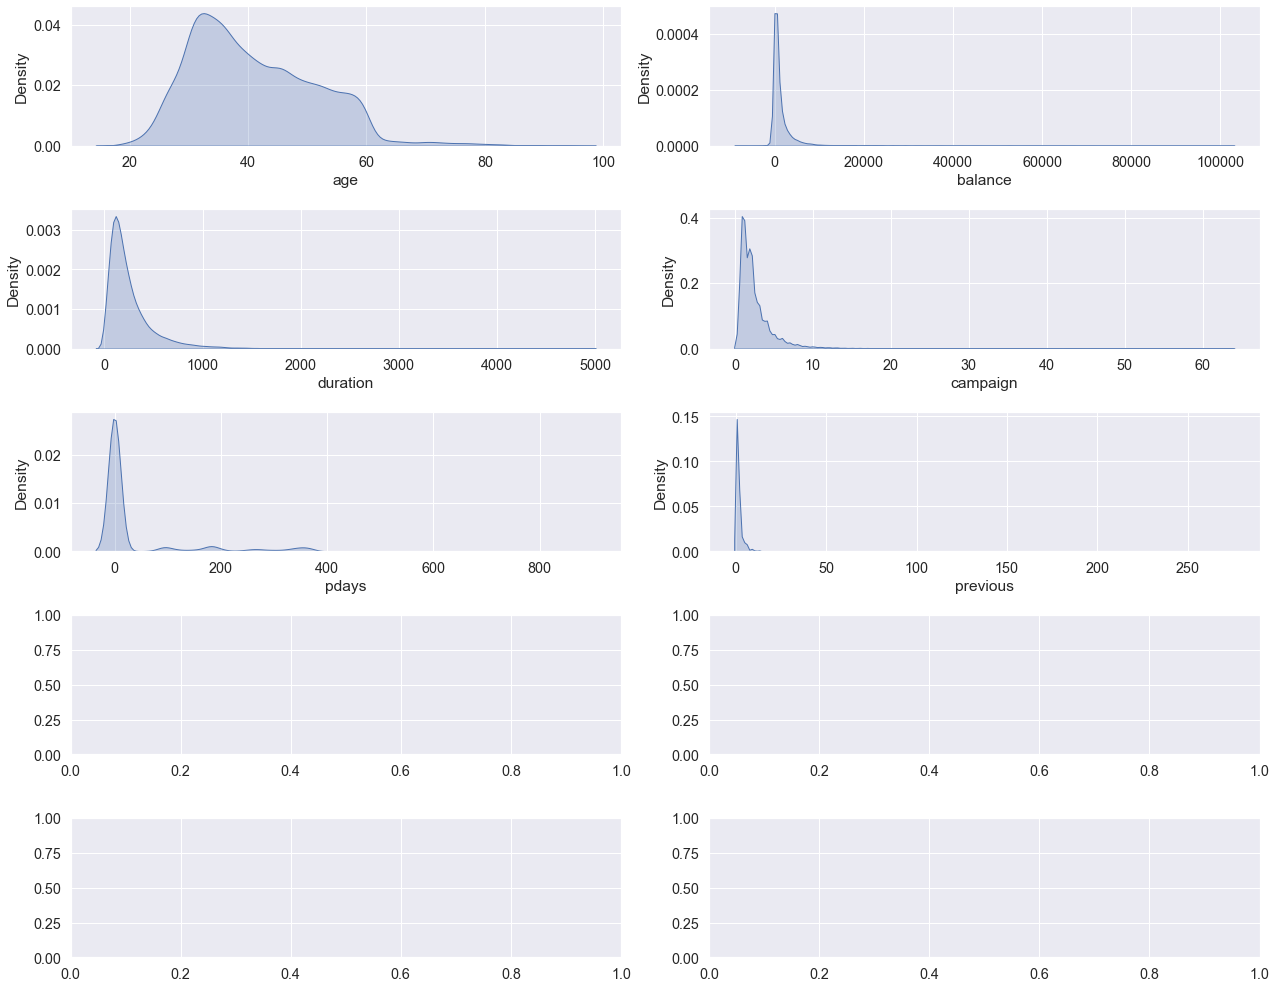

In [19]:
#Univariate Analysis using Density Plots

#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

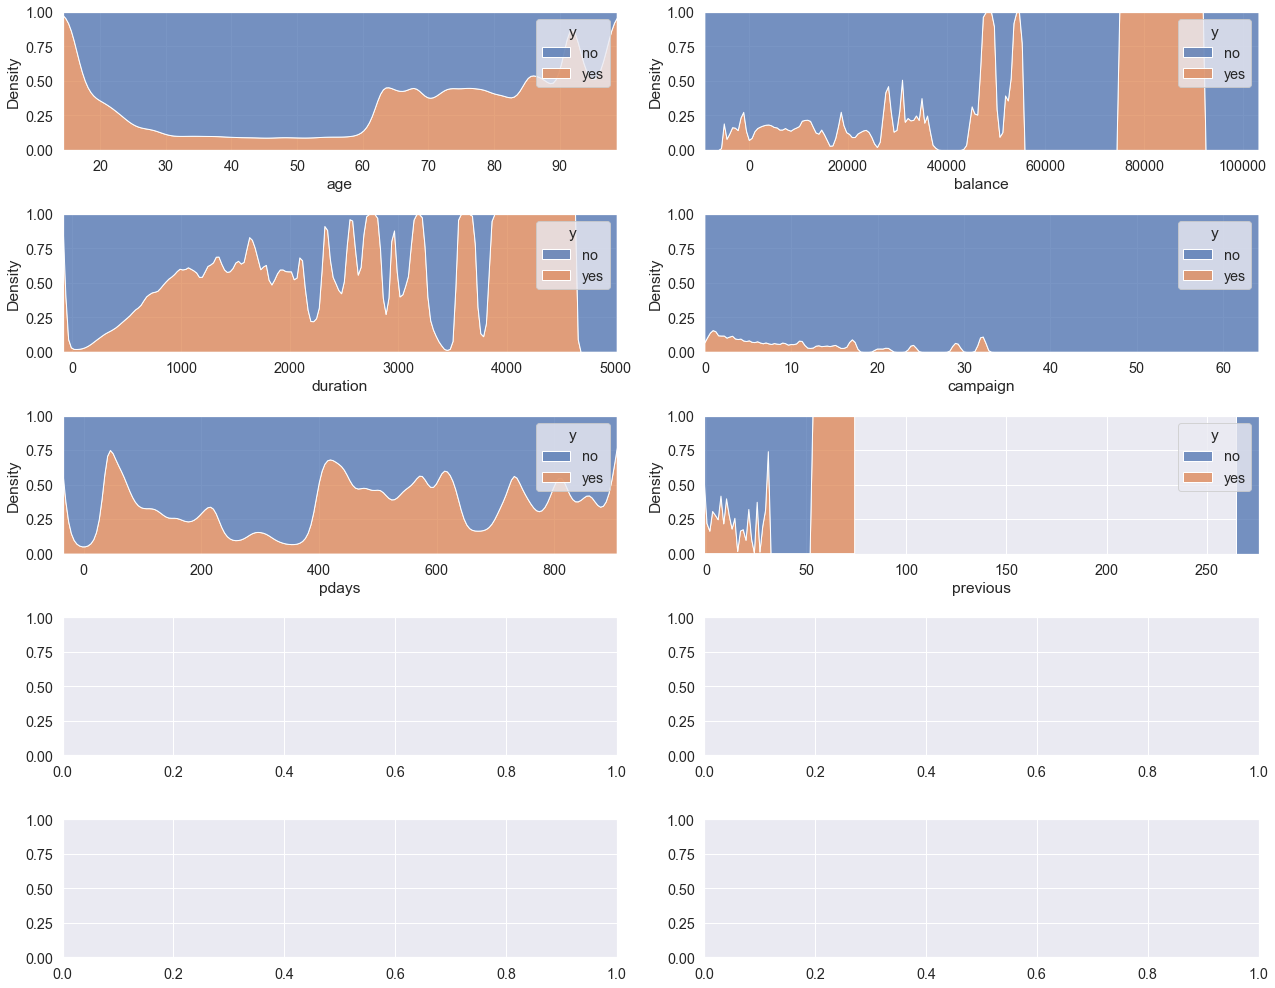

In [20]:
# Bivariate Analysis KDE plots - Relationships with Target Variable

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

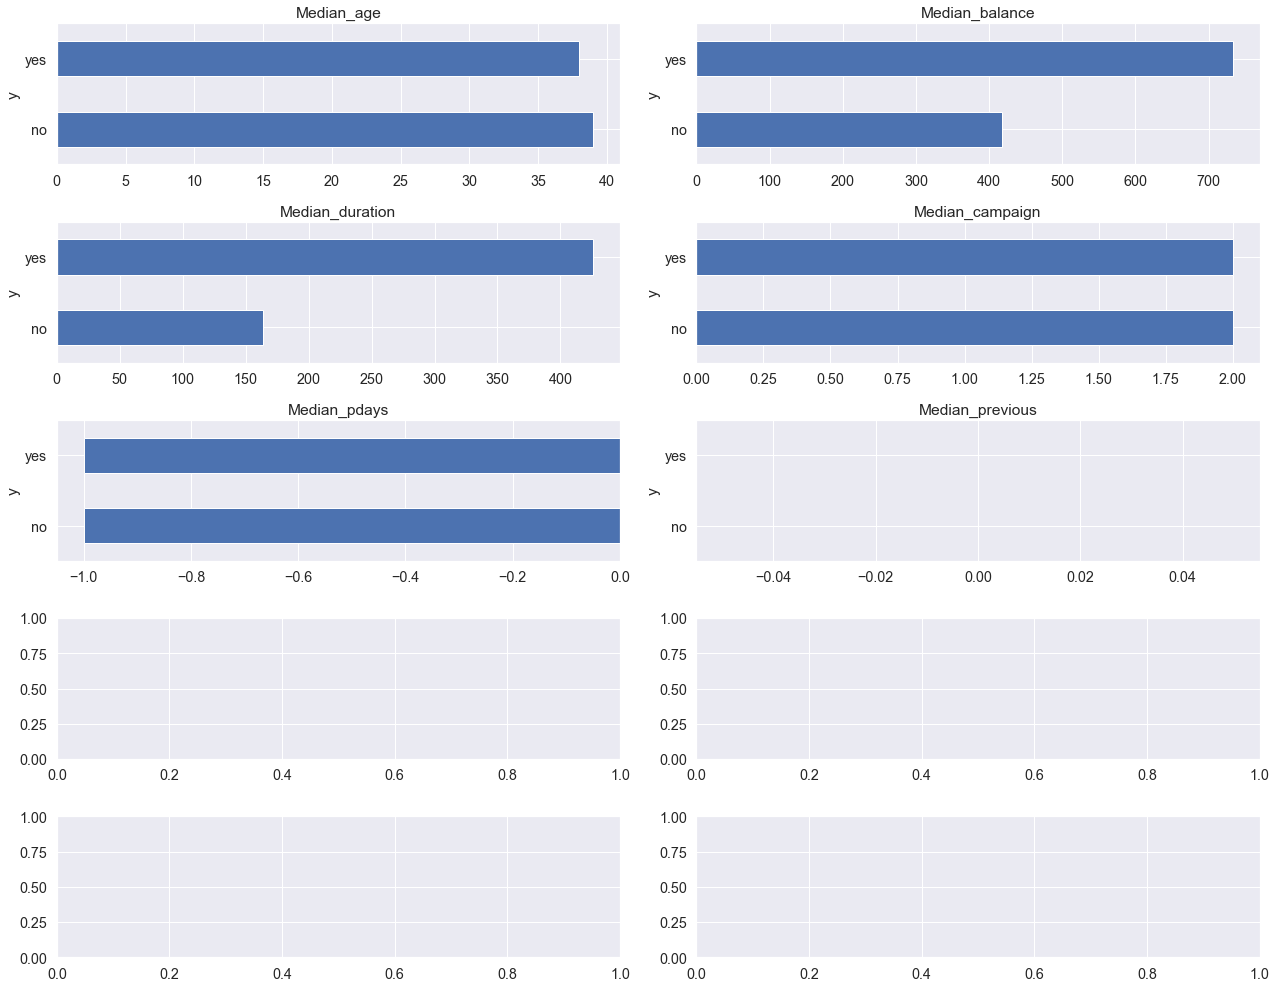

In [21]:
#For each numerical Variable. We will plot the median of the numerical variable for:
#1. When target col == 'no'
#2. when target col == 'yes'

#We are choosing median since median is not affected by outliers, and our data has outliers

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = data.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()


In [22]:
n1=len(data[(data['age'] > 60) & (data['y'] == 'yes')]) #number of old subscribers
n2=len(data[(data['age'] > 60) & (data['y'] == 'no')]) #number of old non-subscribers
n3=len(data[(data['age'] <= 60) & (data['y'] == 'yes')]) #number of young subscribers
n4=len(data[(data['age'] <= 60) & (data['y'] == 'no')]) #number of young non-subscribers

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.10873861390636713 and the proportion of old subscribers is 0.4225589225589226


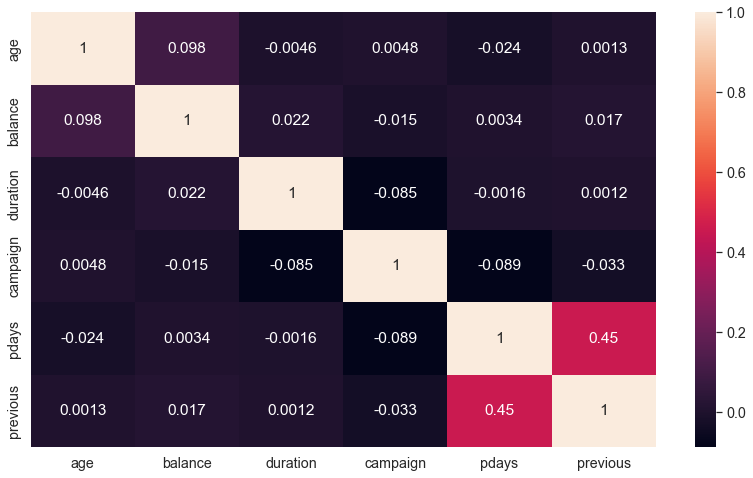

In [23]:
#Bivariate Analysis - Correlation Heatmaps

plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols].corr(), annot=True)

In [24]:
#As given in dataset description, we won't use 'duration' column. 
#Reason: We should note here the column “duration” has an interesting relationship with the target variable. If there were no phone calls (i.e. duration =0) then our target, y, has to be no. This will cause some unbalancing in the model and would inhibit the predictive power. In order to have a more realistic prediction, we will drop this column from our dataframe.

#We can't predict how long we gonna talk to the client (duration) and how many calls would require to get the answer about deposit (campaign), so let's drop these! 

data= data.drop(['duration','campaign'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,-1,0,unknown,no


In [25]:
#replacing no and yes by 0 and 1 respectively as our target values!
data['y'] = data['y'].replace(['no','yes'],[0,1])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,-1,0,unknown,0


In [26]:
feat = [c for c in data.columns if c not in [TARGET_COL]]
len(feat)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33)
print(train.shape)
print(test.shape)


(30291, 15)
(14920, 15)


In [27]:
#Input to our model will be the features
train_X, test_X = train[feat], test[feat]

#Output of our model will be the TARGET_COL
train_y, test_y = train[TARGET_COL], test[TARGET_COL]


In [28]:
#As we saw before too, 0 ('no') is the majority class. Lets begin by predicting everything as 0 ('no').
preds_test = np.zeros(len(test_X))

#accuracy,f1 on test data 
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_y, preds_test)
f1 = f1_score(test_y, preds_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')


Accuracy score is: 0.8834450402144772
F1 score is: 0.0


In [29]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[13181     0]
 [ 1739     0]]


In [30]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5


In [31]:
#Since we are dealing with randomness, its important to set a seed, so we get same randomness everytime.
np.random.seed(2)

preds_test = np.random.choice([0, 1], size=len(test_y))

f1_score(test_y, preds_test)

0.19646918661323515

In [32]:
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[6594 6587]
 [ 832  907]]


In [33]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5109148255157905


In [34]:
train.shape, test.shape

((30291, 15), (14920, 15))

In [35]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
37923,32,blue-collar,single,primary,no,398,yes,no,cellular,14,may,-1,0,unknown,0
14613,47,management,divorced,tertiary,no,1149,no,yes,cellular,15,jul,-1,0,unknown,0
40565,39,services,married,secondary,no,972,yes,no,telephone,10,jul,-1,0,unknown,0
39181,30,management,single,tertiary,no,2017,yes,no,cellular,18,may,-1,0,unknown,0
12588,33,technician,single,secondary,no,0,no,no,unknown,3,jul,-1,0,unknown,0


In [36]:
#Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.
df = pd.concat([train, test], axis=0).reset_index(drop = True) #reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.
df.shape

(45211, 15)

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,32,blue-collar,single,primary,no,398,yes,no,cellular,14,may,-1,0,unknown,0
1,47,management,divorced,tertiary,no,1149,no,yes,cellular,15,jul,-1,0,unknown,0
2,39,services,married,secondary,no,972,yes,no,telephone,10,jul,-1,0,unknown,0
3,30,management,single,tertiary,no,2017,yes,no,cellular,18,may,-1,0,unknown,0
4,33,technician,single,secondary,no,0,no,no,unknown,3,jul,-1,0,unknown,0


In [38]:
#let's remove these two categorical features which we think won't be useful in building our ML models
df.drop(['month','day'],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome,y
0,32,blue-collar,single,primary,no,398,yes,no,cellular,-1,0,unknown,0
1,47,management,divorced,tertiary,no,1149,no,yes,cellular,-1,0,unknown,0
2,39,services,married,secondary,no,972,yes,no,telephone,-1,0,unknown,0
3,30,management,single,tertiary,no,2017,yes,no,cellular,-1,0,unknown,0
4,33,technician,single,secondary,no,0,no,no,unknown,-1,0,unknown,0


In [39]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
  print(df[c].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [40]:
df.shape

(45211, 13)

In [41]:
#dropping rows with 'unknown' values for any categorical column.

index_names= df[(df.job == 'unknown') | (df.marital == 'unknown') | (df.education == 'unknown') | (df.default == 'unknown') | (df.housing == 'unknown') | (df.loan == 'unknown')].index
#print(index_names)
  
# drop these given row 
# indexes from dataFrame 
df.drop(index_names, inplace = True) 
df.shape

(43193, 13)

In [42]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
  print(df[c].value_counts())

blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: job, dtype: int64
married     25946
single      12219
divorced     5028
Name: marital, dtype: int64
secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64
no     42411
yes      782
Name: default, dtype: int64
yes    24292
no     18901
Name: housing, dtype: int64
no     36086
yes     7107
Name: loan, dtype: int64
cellular     28213
unknown      12286
telephone     2694
Name: contact, dtype: int64
unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64


In [43]:
df= pd.get_dummies(df,columns=new_cat_cols)
df.head()

,age,balance,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,398,-1,0,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,47,1149,-1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,39,972,-1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
3,30,2017,-1,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,1
4,33,0,-1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [44]:
df['pdays'].value_counts()

-1      35281
 182      151
 92       138
 183      120
 91       115
        ...  
 454        1
 547        1
 47         1
 416        1
 218        1
Name: pdays, Length: 557, dtype: int64

In [45]:
#Syntax:
#df[new_column]=np.where(condition, value if condition is true, value if condition is false)

df['has_contacted'] = np.where(df['pdays']!= 999, True, False)

df.drop(['pdays'],axis=1,inplace=True)

df.head()

,age,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted
0,32,398,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,True
1,47,1149,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,True
2,39,972,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,True
3,30,2017,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,True
4,33,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,True


In [46]:
df= pd.get_dummies(df,columns=['has_contacted'])
df.head()

,age,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted_True
0,32,398,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
1,47,1149,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,1
2,39,972,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
3,30,2017,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
4,33,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [47]:
features = [c for c in df.columns if c not in [TARGET_COL]]
len(features)

34

In [48]:
trn, test = train_test_split(df, test_size=0.2, random_state = 1, stratify = df[TARGET_COL]) #stratified sampling
trn.shape, test.shape

((34554, 35), (8639, 35))

In [49]:
trn.head()

,age,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted_True
17782,54,24,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
6878,54,7010,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
249,33,896,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
43972,32,610,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
22307,27,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [50]:
#Input to our model will be the features
X_trn, X_test = trn[features], test[features]

#Output of our model will be the TARGET_COL
y_trn, y_test = trn[TARGET_COL], test[TARGET_COL]

In [51]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)
X_trn = scaler.transform(X_trn)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [52]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(max_iter=7600,random_state = 1)
_ = lr.fit(X_trn, y_trn)

#predictions on test data
preds_test= lr.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.2548076923076923

In [54]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[7550   85]
 [ 845  159]]


In [55]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,7550,85,7635
1,845,159,1004
All,8395,244,8639


In [56]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.5736167967292585


In [57]:
dt = DecisionTreeClassifier(random_state = 1)
_ = dt.fit(X_trn, y_trn)

#predictions on test data
preds_test= dt.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.25227817745803355

In [58]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

dt2 = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = dt2.fit(X_trn, y_trn)

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [59]:
optimal_params = {
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.6,
 'max_leaf_nodes': 32,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 3}}

dt2 = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = dt2.fit(X_trn, y_trn)


#predictions on test data
preds_test= dt2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.3493234932349324

In [60]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[7297  338]
 [ 720  284]]


In [61]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,7297,338,7635
1,720,284,1004
All,8017,622,8639


In [62]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.6192993579056401


In [63]:
#creation of random forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10
rf.fit(X_trn, y_trn)

#predictions on test data
preds_test= rf.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)


0.2659279778393352

In [64]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [65]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf2.fit(X_trn, y_trn)

search.best_params_


{'min_samples_split': 10,
 'max_leaf_nodes': 128,
 'max_features': 0.2,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 5}}

In [66]:
optimal_params = {
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.6,
 'max_leaf_nodes': 64,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 5}}

rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf2.fit(X_trn, y_trn)

#predictions on test data
preds_test= rf2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.3901496861419604

In [67]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[6972  663]
 [ 600  404]]


In [68]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,6972,663,7635
1,600,404,1004
All,7572,1067,8639


In [69]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.6577767515400089


In [70]:
#predictions on train data
preds_train= rf2.predict(X_trn)

#f1 score on train set
f1_score(y_trn, preds_train)


0.40331690902535755

In [71]:
#Auc on Train Data
print("AUC on Train data is " +str(roc_auc_score(y_trn,preds_train)))

AUC on Train data is 0.6658653150674131


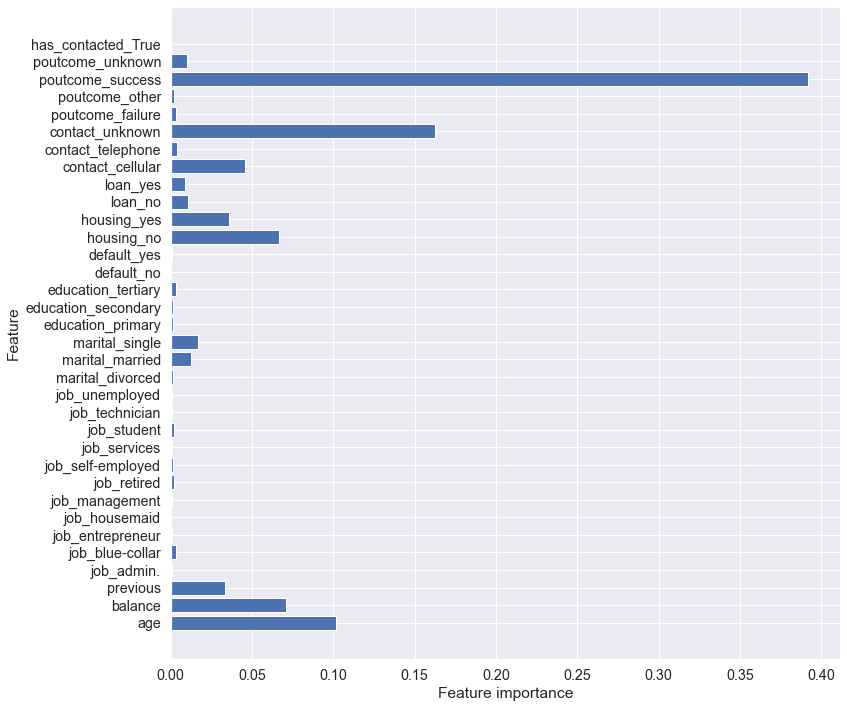

In [72]:
#Visualizing Feature Importance
def plot_feature_importances(model):
    n_features = X_trn.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), trn[features].columns.values) #trn.columns has list of all columns in our training data
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rf2)    

## Conclusion:
This project taught us how to use machine learning to anticipate if a consumer will sign up for a bank's term deposit programme through its marketing campaign. On this dataset, we discovered that tree-based models like Decision Tree and Random Forest perform well. This makes sense because tree-based models typically work effectively when the number of features is not very high. With an F1 score of 0.390 and a ROC_AUC score of 0.657 on the test dataset, the hyperparameter optimised Random Forrest Model had the greatest performance.